# Breast Cancer Dectection



## 1. Data Preprocessing

### a. Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

### b. Importing the dataset

In [3]:
dataset = pd.read_csv('breast_cancer_data.csv')

In [4]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 2. Data Exploration

In [5]:
dataset.shape

(569, 33)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Checking for columns that are categorical

In [7]:
dataset.select_dtypes(include='object').columns

Index(['diagnosis'], dtype='object')

In [8]:
len(dataset.select_dtypes(include='object').columns)        # we have one categorical column

1

### Checking for columns with numerical

In [9]:
dataset.select_dtypes(include=['float64', 'int64']).columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [10]:
len(dataset.select_dtypes(include=['float64', 'int64']).columns)# we have 32 numerical columns

32

## Checking for statistical summary of the dataset

In [11]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


### Getting the list of all the columns in the dataset

In [12]:
dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

## 3. Dealing with missing values

#### Check if the dataset has null values

In [13]:
dataset.isnull().values.any()

True

#### Check the number of null values in the dataset

In [14]:
dataset.isnull().values.sum()

569

#### Check the column that has null values

In [15]:
dataset.columns[dataset.isnull().any()]

Index(['Unnamed: 32'], dtype='object')

In [16]:
len(dataset.columns[dataset.isnull().any()])

1

In [17]:
dataset['Unnamed: 32'].count()         # This shows that all the values in the column are null

0

### Drop the null value column

In [18]:
dataset = dataset.drop(columns='Unnamed: 32')

In [19]:
dataset.shape

(569, 32)

In [20]:
dataset.isnull().values.any()        # Check if there are still null values in the dataset

False

## Dealing with categorical data

In [21]:
dataset.select_dtypes(include='object').columns

Index(['diagnosis'], dtype='object')

In [22]:
dataset['diagnosis'].unique() # checking the unique values in the columm

array(['M', 'B'], dtype=object)

In [23]:
dataset['diagnosis'].nunique()

2

### Performing One hot encoding to convert the categorical values into numerical values

In [24]:
dataset = pd.get_dummies(data=dataset,dtype=int, drop_first=True)

In [25]:
dataset.head(5)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


## CountPlot on the dataset

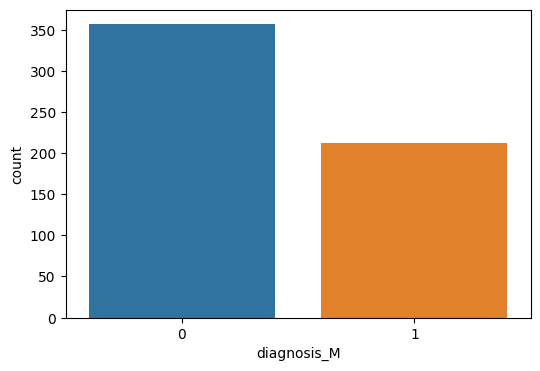

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(x='diagnosis_M', data=dataset)
plt.show()

##### Getthing the number of dataset with Benign values  

In [27]:
(dataset.diagnosis_M ==0 ).sum()

357

##### Getting  the number of dataset with Malignant values

In [28]:
(dataset.diagnosis_M ==1 ).sum()

212

## Correlation matrix and Heat map

In [29]:
dataset_2 = dataset.drop(columns='diagnosis_M')

In [30]:
dataset_2.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: title={'center': 'Correlation with Diagnosis_M'}>

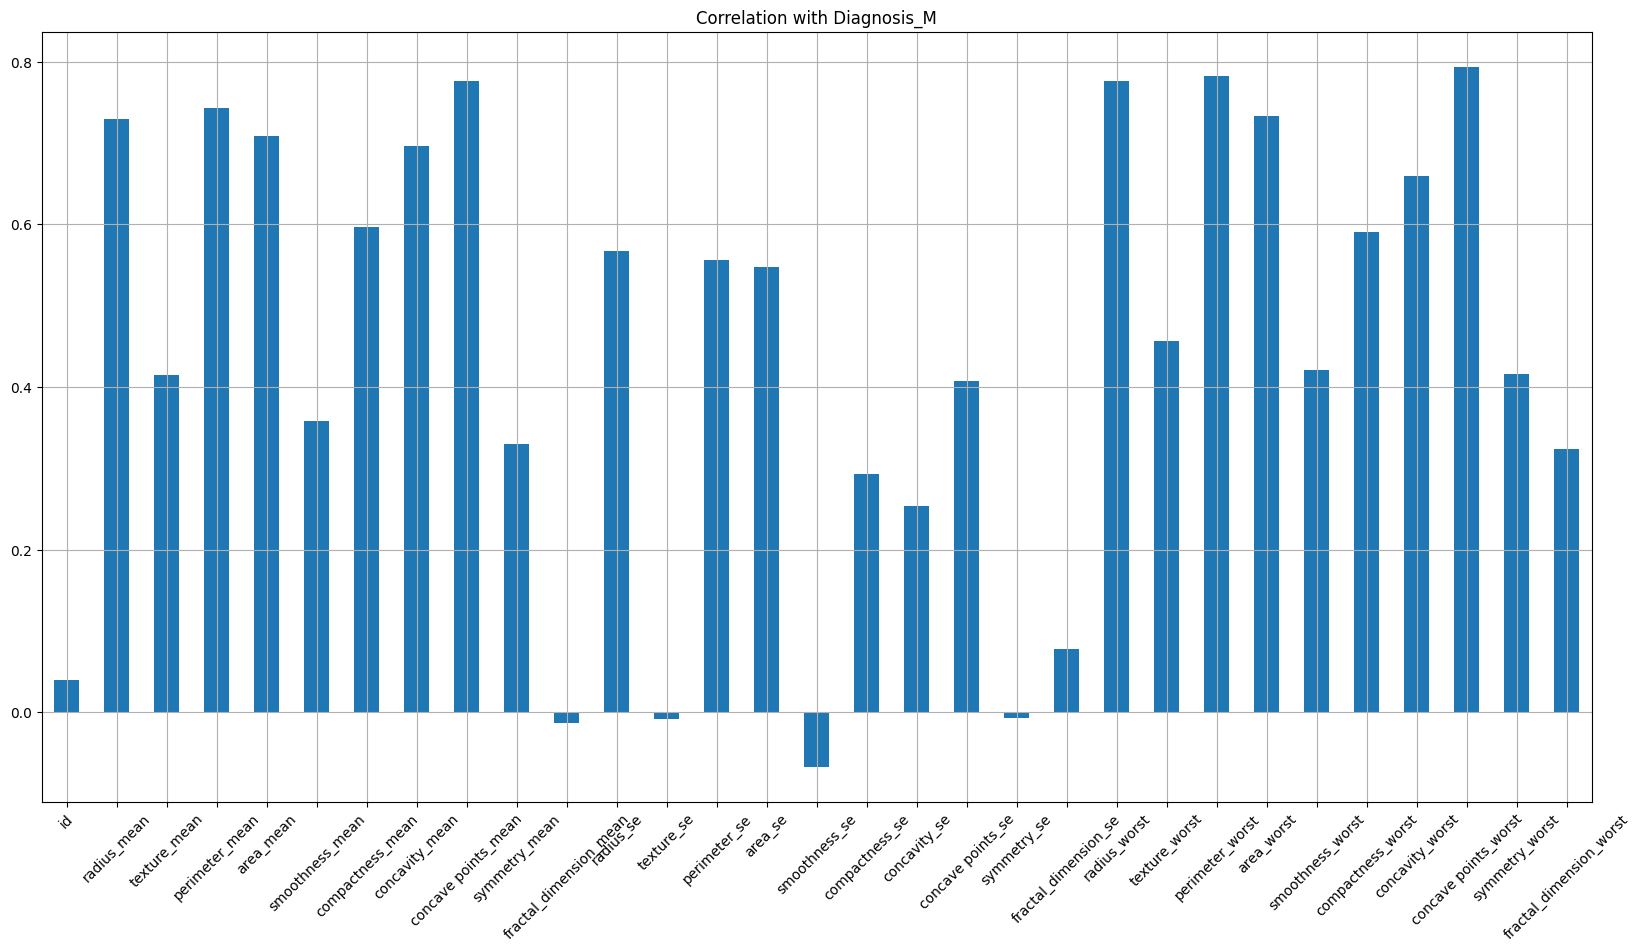

In [31]:
plt.figure(figsize=(20,10))
dataset_2.corrwith(dataset['diagnosis_M']).plot.bar(
title = "Correlation with Diagnosis_M", rot=45, grid=2)

### Correlation matrix

In [32]:
correlation_with = dataset.corr()

In [33]:
correlation_with

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,0.039769
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499


## Drawing up a Heat Map

<Axes: >

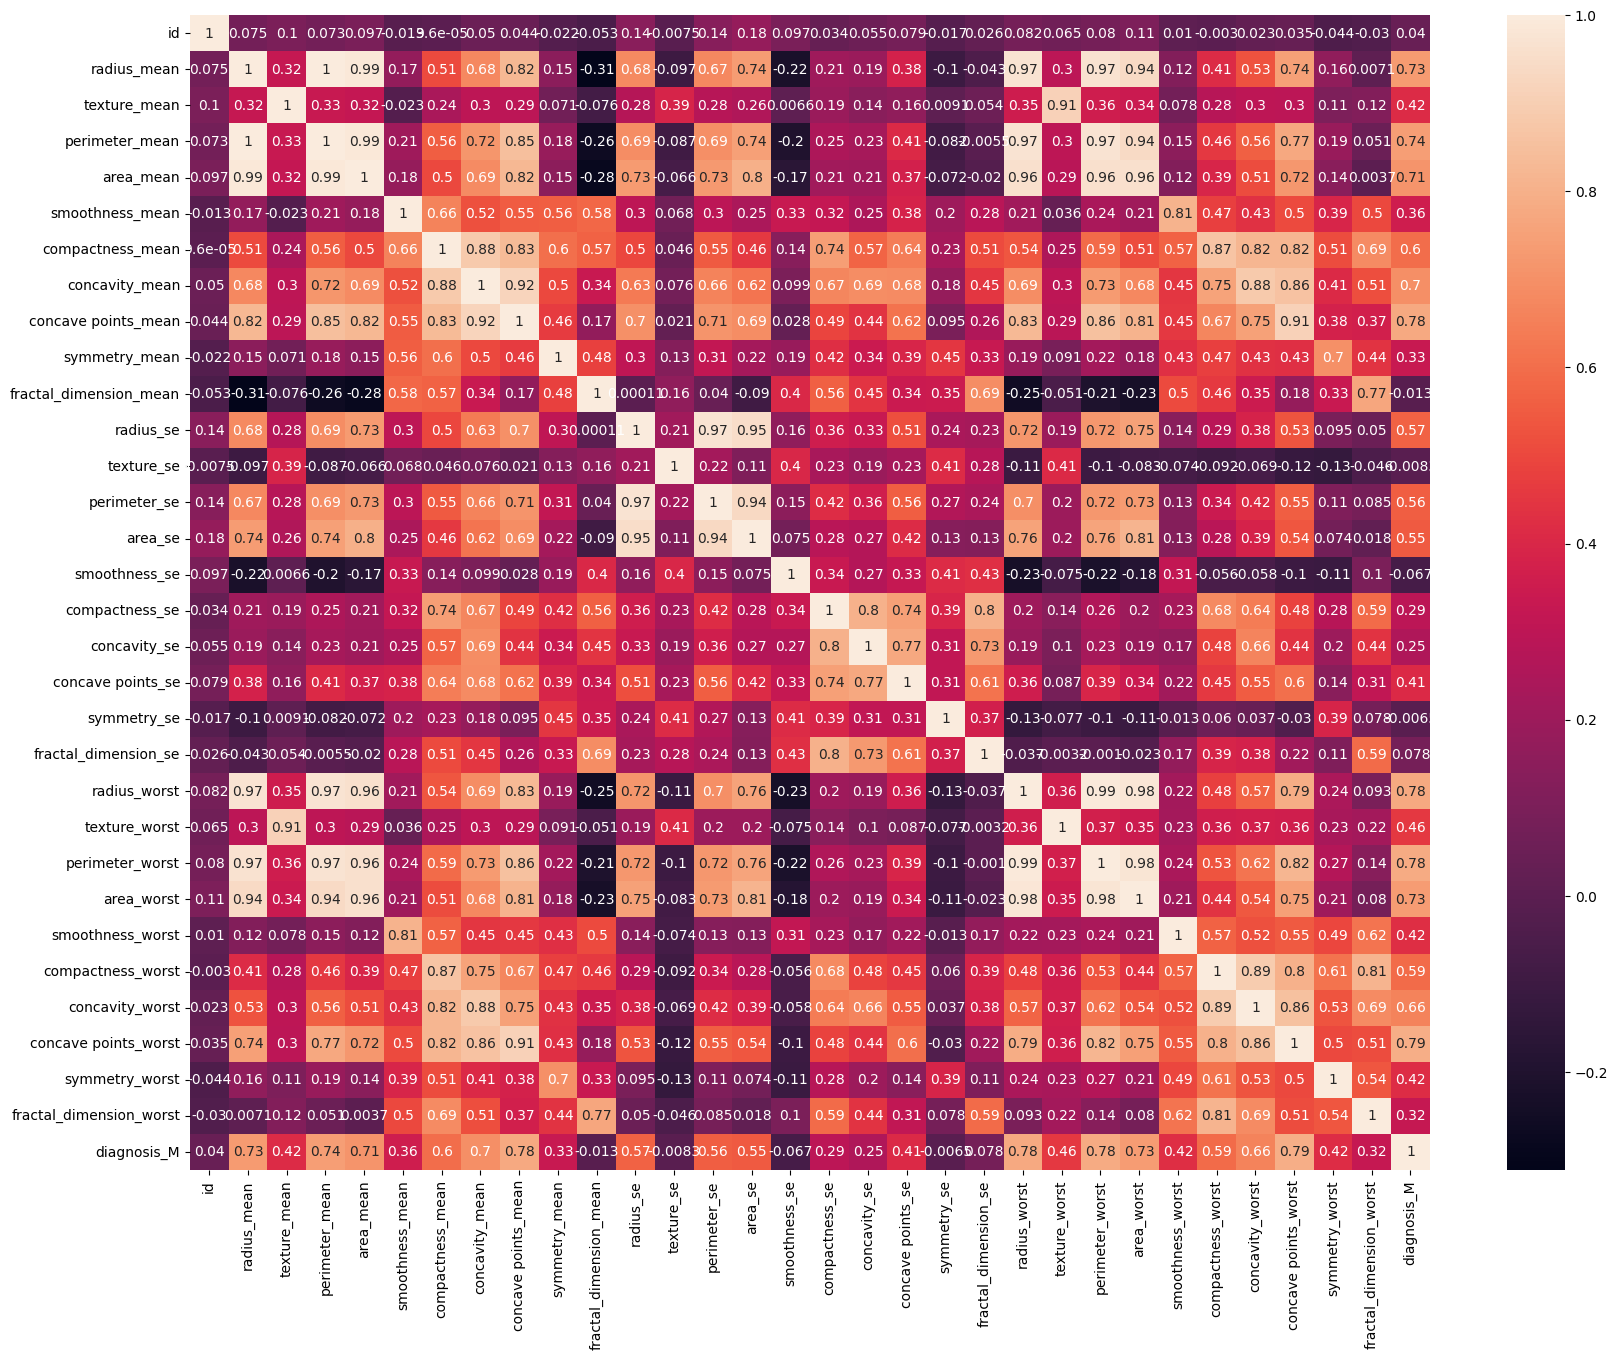

In [34]:
plt.figure(figsize=(20,15))
sns.heatmap(correlation_with, annot=True)

# Splitting the dataset into training and test set

In [35]:
dataset.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


## Selecting all the Independent variables

In [36]:
X = dataset.iloc[:, 1:-1].values

In [37]:
X.shape

(569, 30)

## Selecting the Dependent Variable

In [38]:
y = dataset.iloc[:, -1].values

In [39]:
y.shape

(569,)

## Splitting the dataset

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [42]:
X_train.shape

(455, 30)

In [43]:
X_test.shape

(114, 30)

In [44]:
y_train.shape

(455,)

In [45]:
y_test.shape

(114,)

## Feature Scaling by Standardization

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()

In [48]:
X_train = scaler.fit_transform(X_train)

In [49]:
X_test = scaler.transform(X_test)

In [50]:
X_train

array([[ 1.77441228,  2.35932161,  1.91226601, ...,  2.25330862,
         2.03215   ,  2.2008957 ],
       [-0.1322665 , -1.38923972, -0.19179709, ..., -0.8955658 ,
        -0.13570987, -0.90420962],
       [ 0.31439324,  0.82581925,  0.29904315, ...,  0.46725269,
        -0.59363596, -0.88537737],
       ...,
       [-0.53146865, -1.62264951, -0.56053374, ..., -0.15041231,
         0.35651781, -0.46220569],
       [-0.10993352, -0.46960512, -0.17643306, ..., -1.0017555 ,
        -0.92293113, -0.68930044],
       [ 1.81070339,  2.77712515,  1.73436674, ...,  0.74565834,
        -0.05853131, -0.11547077]])

In [51]:
X_test

array([[ 0.33951785, -1.71134524,  0.39203595, ...,  1.00124386,
         0.53831618,  0.92694953],
       [-1.37090981,  0.63442322, -1.36633653, ..., -1.38817646,
        -0.80116052, -0.57242973],
       [-0.15459949, -0.73569229, -0.20069205, ..., -0.71528673,
         0.72182964, -0.40183172],
       ...,
       [-0.68221631, -0.45793463, -0.70932221, ..., -0.96341767,
        -0.21117334, -0.16919807],
       [ 1.70183007,  0.534057  ,  1.74245307, ...,  2.30655561,
         4.55503123,  1.00449408],
       [ 0.85038493,  0.67877108,  0.87317259, ...,  0.54636249,
         0.28276941, -0.52202577]])

# 2. Building our Model

### a . Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
classifier_lr = LogisticRegression(random_state=0)

In [54]:
classifier_lr.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [55]:
y_pred = classifier_lr.predict(X_test)

### Analyzing the performance of our model

In [56]:
from sklearn.metrics import confusion_matrix,classification_report

In [57]:
print(confusion_matrix(y_test, y_pred))

[[73  2]
 [ 2 37]]


In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        75
           1       0.95      0.95      0.95        39

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



### Cross validation of our model

In [59]:
from sklearn.model_selection import cross_val_score

In [60]:
accuracies = cross_val_score(estimator=classifier_lr,X=X_train, y= y_train, cv=10)

In [61]:
print('Accuracy is {:.2f}%'.format(accuracies.mean()*100))
print('Accuracy is {:.2f}%'.format(accuracies.std()*100))

Accuracy is 97.57%
Accuracy is 2.52%


### b. Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
classifier_rfc = RandomForestClassifier(random_state=0)

In [64]:
classifier_rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [65]:
y_pred = classifier_rfc.predict(X_test)

In [66]:
from sklearn.metrics import confusion_matrix,classification_report

In [67]:
print(confusion_matrix(y_test, y_pred))

[[73  2]
 [ 0 39]]


In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        75
           1       0.95      1.00      0.97        39

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



## Cross validation with Random Forest classifier

In [69]:
from sklearn.model_selection import cross_val_score

In [70]:
accuracies = cross_val_score(estimator=classifier_rfc,X=X_train, y= y_train, cv=10)

In [71]:
print('Accuracy is {:.2f}%'.format(accuracies.mean()*100))
print('Accuracy is {:.2f}%'.format(accuracies.std()*100))

Accuracy is 96.47%
Accuracy is 2.48%


### Here the Logistic regression performed more than the random forest classifier based on the  cross validation of both models




## Hyperparameter tunning with Randomized Search to find the best parameter(Logistic Regression)

In [72]:
from sklearn.model_selection import RandomizedSearchCV

In [73]:
parameters = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.25,0.5,0.78,1.0,1.25,1.5,1.75,2.0],
    'solver': ['newton-cg','lbfgs','liblinear']
}

In [74]:
random_search = RandomizedSearchCV(estimator=classifier_lr,
                                   param_distributions=parameters,
                                   n_iter=20, scoring='roc_auc',
                                  n_jobs=-1,cv=10,verbose=1)

In [75]:
random_search.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=10, estimator=LogisticRegression(random_state=0),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'C': [0.25, 0.5, 0.78, 1.0, 1.25, 1.5,
                                              1.75, 2.0],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   scoring='roc_auc', verbose=1)

In [76]:
random_search.best_estimator_

LogisticRegression(C=0.5, random_state=0)

In [77]:
random_search.best_params_

{'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.5}

In [78]:
random_search.best_score_

0.9948682346501819


# Final model of choice is Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
classifier = LogisticRegression(C=0.25,solver="liblinear",penalty='l2')

In [81]:
classifier.fit(X_train,y_train)

LogisticRegression(C=0.25, solver='liblinear')

In [82]:
y_pred = classifier.predict(X_test)

In [83]:
from sklearn.metrics import confusion_matrix,classification_report

In [84]:
print(confusion_matrix(y_test, y_pred))

[[74  1]
 [ 1 38]]


In [85]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        75
           1       0.97      0.97      0.97        39

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## Cross validation after hyperparemeter tunning

In [86]:
accuracies = cross_val_score(estimator=classifier,X=X_train, y= y_train, cv=10)

In [87]:
print('Accuracy is {:.2f}%'.format(accuracies.mean()*100))
print('Accuracy is {:.2f}%'.format(accuracies.std()*100))

Accuracy is 97.35%
Accuracy is 2.39%


# Predicting a single Observation

In [88]:
single_obs = [[ 20.57, 17.77, 132.9, 1326, 0.08474, 0.07864, 0.0869, 0.07017,
               0.1812, 0.05667, 0.5435, 0.7339, 3.398, 74.08,0.005225, 0.01308, 
               0.0186, 0.0134, 0.01389, 0.003532, 24.99, 23.41, 158.8, 1956,
               0.1238, 0.1866, 0.2416, 0.186, 0.275, 0.08902]]


In [89]:
single_obs

[[20.57,
  17.77,
  132.9,
  1326,
  0.08474,
  0.07864,
  0.0869,
  0.07017,
  0.1812,
  0.05667,
  0.5435,
  0.7339,
  3.398,
  74.08,
  0.005225,
  0.01308,
  0.0186,
  0.0134,
  0.01389,
  0.003532,
  24.99,
  23.41,
  158.8,
  1956,
  0.1238,
  0.1866,
  0.2416,
  0.186,
  0.275,
  0.08902]]

In [90]:
classifier.predict(scaler.transform(single_obs))

array([1])

In [91]:
## From this result, you can see that the model predicted 1 which is Malignant, and thu